# Mounting content at drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [3]:
#Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import LogNorm


# Set the base directory
#base_dir = './Data/'

# Set the base directory
base_dir ='/content/drive/MyDrive/ENSAE/Cursos/S1/MACHINE LEARNING WITH PYTHON/Proyecto Final/Data/'
    

# First part: Joining the 4 tables in a single dataframe



In [4]:
#2019-2021
Accidents = []

# Loop over the directories
for year in ['2019', '2020', '2021']:
    # Set the current directory
    current_dir = base_dir + year + '/'


    # Loop over the files in the current directory
    for file in os.listdir(current_dir):
        dfusagers = pd.read_csv(current_dir + "usagers-" + year + ".csv", sep=";")
        dfcaracteristiques = pd.read_csv(current_dir + "caracteristiques-" + year + ".csv", sep=";")
        dflieux = pd.read_csv(current_dir + "lieux-" + year + ".csv", sep=";")
        dfvehicles = pd.read_csv(current_dir + "vehicules-" + year + ".csv", sep=";")
       


        #join data frames for a given year
        result = pd.merge(dfusagers, dfcaracteristiques, on='Num_Acc')
        result = pd.merge(result, dflieux, on='Num_Acc')
        result = pd.merge(result, dfvehicles,  on=['Num_Acc','id_vehicule'])
     
    
        #Append data frames in a list 
        Accidents.append(result)
        
                       
        
#Final data frame of accidents 2019-2021
dfAccidents = Accidents[0]

for i in range(11):
    dfAccidents = pd.concat([dfAccidents, Accidents[i+1]])

In [5]:
#Grouping target variable and disregarding the "usagers en fuite"

def label_values(value):
    if value == 4:
        return 3
    else:
        return value
    
dfAccidents["grav_2"] = dfAccidents["grav"].apply(label_values)

condition = dfAccidents['grav_2'] == -1 
dfAccidents.drop(dfAccidents[condition].index, inplace=True)

dfAccidents.grav_2.unique()    

array([3, 1, 2])

# Second part: Exploration and data cleanning

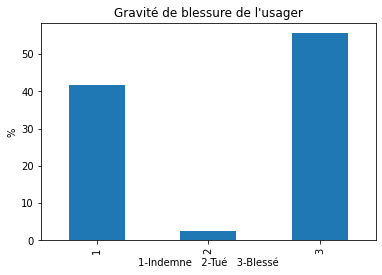

In [6]:
# Plot the percentage of rows for each category
grouped = dfAccidents.groupby('grav_2').size()
grouped = grouped.apply(lambda x: x / len(dfAccidents) * 100)
grouped.plot(kind='bar')
plt.ylabel("%")
plt.xlabel("1-Indemne   2-Tué   3-Blessé")
plt.title("Gravité de blessure de l'usager")
plt.show()

[1 2]


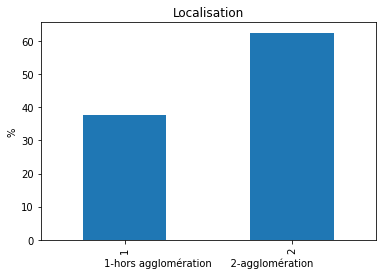

In [7]:
#Agg
unique_values = dfAccidents["agg"].unique()
print(unique_values)

# Plot the percentage of rows for each category
grouped = dfAccidents.groupby('agg').size()
grouped = grouped.apply(lambda x: x / len(dfAccidents) * 100)
grouped.plot(kind='bar')
plt.ylabel("%")
plt.xlabel("1-hors agglomération      2-agglomération")
plt.title("Localisation")
plt.show()

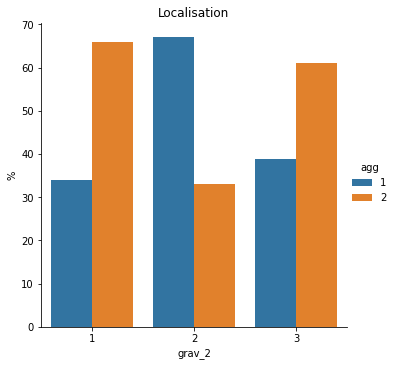

In [8]:
x="grav_2"
y="agg"
(dfAccidents.groupby(x)[y].value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))


plt.ylabel("%")
plt.title("Localisation")
plt.show()

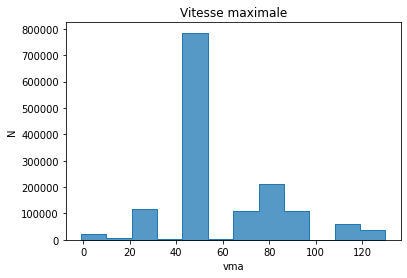

In [9]:
#vma
dfAccidents['vma'] = pd.to_numeric(dfAccidents['vma'], errors='coerce')
dfAccidents.loc[dfAccidents['vma'] > 130, 'vma'] /= 10
unique_values = dfAccidents['vma'].unique()


sns.histplot(dfAccidents['vma'], element='step', bins=12)
plt.title("Vitesse maximale")
plt.ylabel("N")
plt.show()


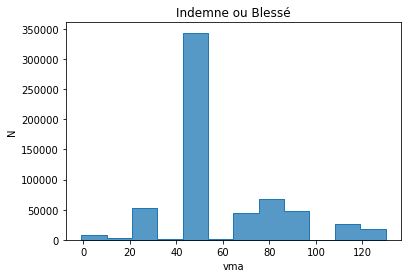

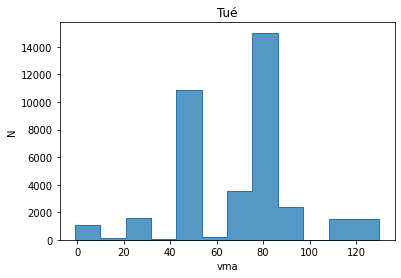

In [10]:
#Vitesse

data1 = dfAccidents.query('grav_2 == 1' or 'grav_2 == 3')
data2 = dfAccidents.query('grav_2 == 2')


sns.histplot(data1["vma"], element='step', bins=12)
plt.title("Indemne ou Blessé")
plt.ylabel("N")
plt.show()


sns.histplot(data2["vma"], element='step', bins=12)
plt.title("Tué")
plt.ylabel("N")
plt.show()



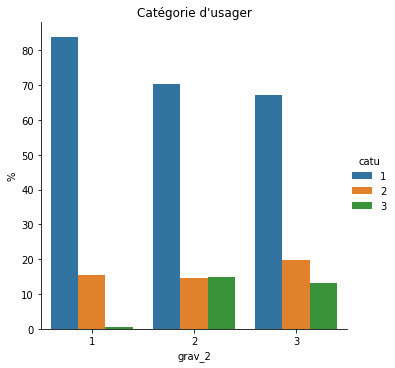

In [11]:
x="grav_2"
y="catu"
(dfAccidents.groupby(x)[y].value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))


plt.ylabel("%")
plt.title("Catégorie d'usager")
plt.show()



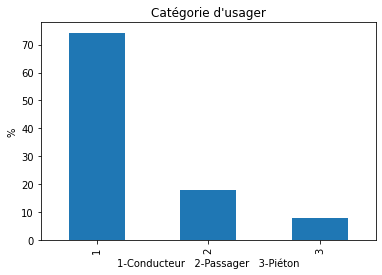

In [12]:
#User category

# Plot the percentage of rows for each category


# Plot the percentage of rows for each category
grouped = dfAccidents.groupby('catu').size()
grouped = grouped.apply(lambda x: x / len(dfAccidents) * 100)
grouped.plot(kind='bar')
plt.ylabel("%")
plt.xlabel("1-Conducteur   2-Passager   3-Piéton")
plt.title("Catégorie d'usager")
plt.show()


In [13]:
table = pd.crosstab(dfAccidents['catu'], dfAccidents['grav_2'])
table_percent = table.apply(lambda x: x/x.sum()*100, axis=1)
print(table_percent)

grav_2          1         2          3
catu                                  
1       47.246815  2.449517  50.303668
2       36.515339  2.128957  61.355705
3        2.954781  4.898171  92.147049


[ 2  1 -1]


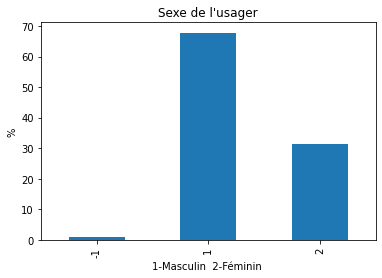

In [14]:
#Gender
unique_values = dfAccidents["sexe"].unique()
print(unique_values)

# Plot the percentage of rows for each category
grouped = dfAccidents.groupby('sexe').size()
grouped = grouped.apply(lambda x: x / len(dfAccidents) * 100)
grouped.plot(kind='bar')
plt.ylabel("%")
plt.xlabel("1-Masculin  2-Féminin ")
plt.title("Sexe de l'usager")
plt.show()

#Missing values represent less than 1% of records. They are filled in with the mode 
dfAccidents.loc[(dfAccidents["sexe"] == -1), 'sexe']=dfAccidents["sexe"].mode()[0]

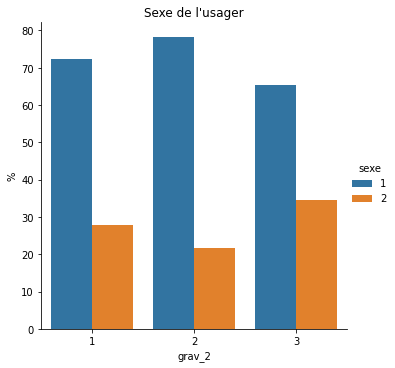

In [15]:
x="grav_2"
y="sexe"
(dfAccidents.groupby(x)[y].value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))


plt.ylabel("%")
plt.title("Sexe de l'usager")
plt.show()

[2002. 1993. 1959. 1994. 1996. 1930. 1995. 1966. 1978. 1984. 1997. 1998.
 1999. 1936. 1991. 1985. 1953. 2000. 1967. 1969. 1970. 1963. 1988. 1990.
 1992. 1975. 1971. 1946. 1980. 2015. 1981. 1989. 1976. 1974. 1983. 1973.
 2008. 1968. 1982. 1962. 1979. 2001. 2003. 1928. 1987. 2004. 2006. 1958.
 1986. 1952. 1964. 1977. 1955. 1944. 1965. 1951. 1960. 1932. 2010. 1948.
 1961. 1972. 1941. 1954. 1943. 1957. 1949. 1940. 1937. 2011. 2013. 2016.
 1931. 1926. 2005. 1942. 1939. 1933. 1934. 2007. 1924. 2014. 2018. 2017.
 2012. 1945. 1938. 1956. 1929. 2009. 1947. 1950. 1935. 2019. 1927. 1900.
 1920. 1925. 1901. 1923. 1922. 1919. 1921. 1911. 2020. 1910.   nan 2021.
 1912.]


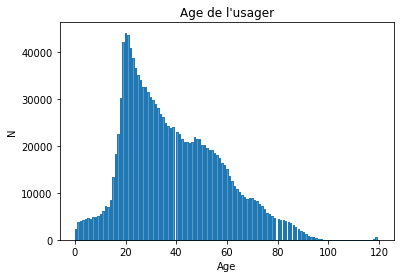

In [16]:
#Age in years at the date of the accident
dfAccidents['Age'] = dfAccidents['an'] - dfAccidents['an_nais']
unique_values = dfAccidents['an_nais'].unique()
print(unique_values)



sns.histplot(dfAccidents['Age'], element='step')
plt.title("Age de l'usager")
plt.ylabel("N")
plt.show()



In [17]:
#Extreme and missing values are filled in with average age

missing_values = dfAccidents.isna().sum()['Age']
print(missing_values)
dfAccidents['Age'].fillna(dfAccidents['Age'].mean(), inplace=True)


extreme_values = dfAccidents.loc[(dfAccidents["Age"] > 100), 'Age']
print(len(extreme_values))
dfAccidents.loc[(dfAccidents["Age"] > 100), 'Age']=dfAccidents["Age"].mean() 




12028
796


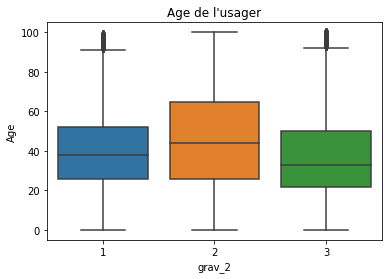

In [18]:
sns.boxplot(x='grav_2', y='Age', data=dfAccidents)
plt.title("Age de l'usager")
plt.show()

In [19]:
#pr_1
dfAccidents.loc[dfAccidents['pr1'] == '(1)', 'pr1'] = '-1'
dfAccidents['pr1'] = pd.to_numeric(dfAccidents['pr1'], errors='coerce')
unique_values = dfAccidents['pr1'].unique()
print(unique_values)
min(unique_values)

[ 900  845  500 ... 1153 1267 1423]


-1

In [20]:
#lartpc
dfAccidents['lartpc'] = dfAccidents['lartpc'].str.replace('.', ',')
dfAccidents['lartpc'] = pd.to_numeric(dfAccidents['lartpc'], errors='coerce')
unique_values = dfAccidents['lartpc'].unique()
print(unique_values)
min(unique_values)

<ipython-input-20-60308f7ed6ee>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfAccidents['lartpc'] = dfAccidents['lartpc'].str.replace('.', ',')


[nan  0.  3.  8.  4.  2. 42. 15. 20.  5.  6. 40. 13.]


nan

In [21]:
#larrout
dfAccidents['larrout'] = dfAccidents['larrout'].str.replace('.', ',')
dfAccidents['larrout'] = pd.to_numeric(dfAccidents['larrout'], errors='coerce')
unique_values = dfAccidents['larrout'].unique()
print(unique_values)
min(unique_values)

<ipython-input-21-412a79719847>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfAccidents['larrout'] = dfAccidents['larrout'].str.replace('.', ',')


[ nan  -1.   5.   7.   4.   6.  14.   0.  10.   9.   3.  12.  21.   8.
  17.  24.  11.  15.  18.  46.  13.  16. 105.  20.  19.  30.]


nan

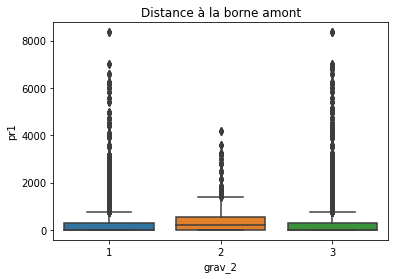

In [22]:
#Boxplot continuous variables
sns.boxplot(x='grav_2', y='pr1', data=dfAccidents)
plt.title("Distance à la borne amont")
plt.show()

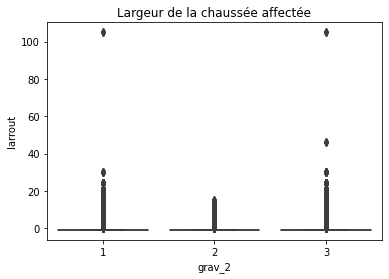

In [23]:
#Boxplot continuous variables
sns.boxplot(x='grav_2', y='larrout', data=dfAccidents)
plt.title("Largeur de la chaussée affectée")
plt.show()

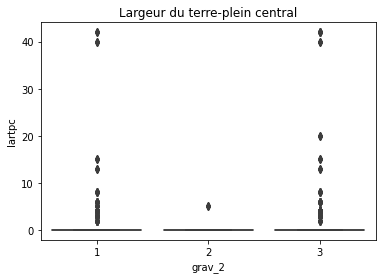

In [24]:
#Boxplot continuous variables
sns.boxplot(x='grav_2', y='lartpc', data=dfAccidents)
plt.title("Largeur du terre-plein central")
plt.show()

[ 4  3  1  5  2 -1]


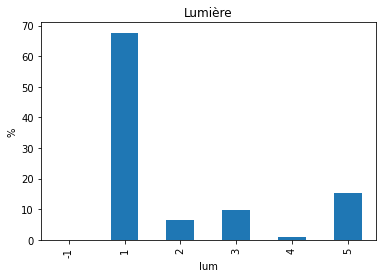

In [25]:
#Luminosité
unique_values = dfAccidents["lum"].unique()
print(unique_values)

# Plot the percentage of rows for each category
grouped = dfAccidents.groupby('lum').size()
grouped = grouped.apply(lambda x: x / len(dfAccidents) * 100)
grouped.plot(kind='bar')
plt.ylabel("%")
plt.title("Lumière")
plt.show()

#Missing values represent less than 1% of records. They are filled in with the mode 
dfAccidents.loc[(dfAccidents["lum"] == -1), 'lum']=dfAccidents["lum"].mode()[0]

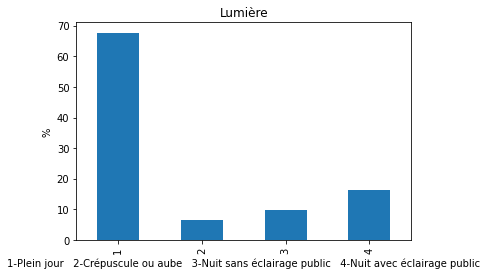

In [26]:
#Grouping of categories 4 and 5
dfAccidents.loc[(dfAccidents["lum"] == 5), 'lum']=4

grouped = dfAccidents.groupby('lum').size()
grouped = grouped.apply(lambda x: x / len(dfAccidents) * 100)
grouped.plot(kind='bar')
plt.ylabel("%")
plt.xlabel("1-Plein jour   2-Crépuscule ou aube   3-Nuit sans éclairage public   4-Nuit avec éclairage public")
plt.title("Lumière")
plt.show()


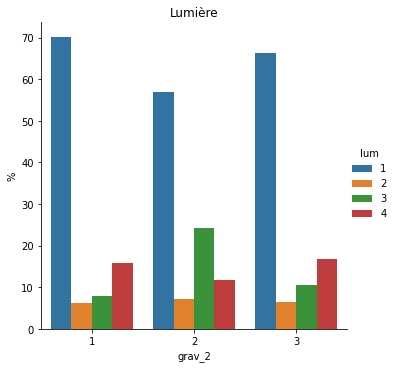

In [27]:
x="grav_2"
y="lum"
(dfAccidents.groupby(x)[y].value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))


plt.ylabel("%")
plt.title("Lumière")
plt.show()

[ 0  5  9  1  4  2  3 -1]


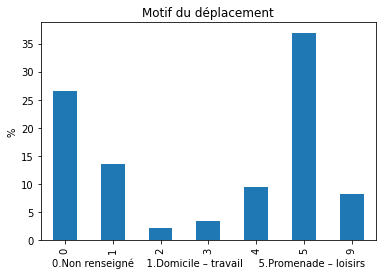

In [28]:
#Trajet
unique_values = dfAccidents["trajet"].unique()
print(unique_values)


#Grouping of categories -1 and 0 "non reinsegné"
dfAccidents.loc[(dfAccidents["trajet"] == -1), 'trajet']=0

# Plot the percentage of rows for each category
grouped = dfAccidents.groupby('trajet').size()
grouped = grouped.apply(lambda x: x / len(dfAccidents) * 100)
grouped.plot(kind='bar')
plt.ylabel("%")
plt.xlabel("0.Non renseigné    1.Domicile – travail     5.Promenade – loisirs")
plt.title("Motif du déplacement")
plt.show()

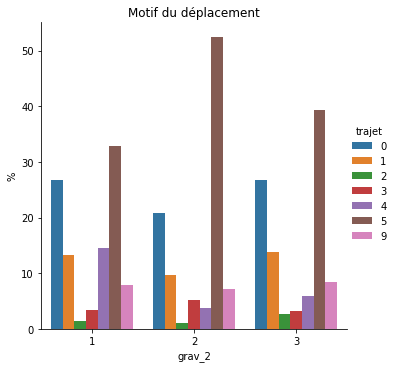

In [29]:
x="grav_2"
y="trajet"
(dfAccidents.groupby(x)[y].value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))


plt.ylabel("%")
plt.title("Motif du déplacement")
plt.show()

[ 2  6  4  3  5  7  1 -1]


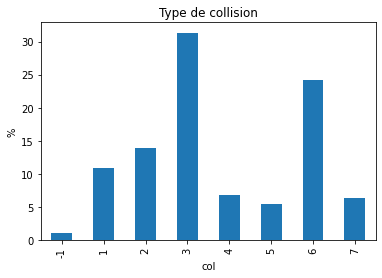

[1 3 2 4]


In [30]:
#Type de collision
unique_values = dfAccidents["col"].unique()
print(unique_values)

# Plot the percentage of rows for each category
grouped = dfAccidents.groupby('col').size()
grouped = grouped.apply(lambda x: x / len(dfAccidents) * 100)
grouped.plot(kind='bar')
plt.ylabel("%")
plt.title("Type de collision")
plt.show()




#New collision feature with grouping of categories 1-3, 4-5 and  "non reinsegné" = 3
dfAccidents["col_2"] = dfAccidents["col"]
dfAccidents.loc[(dfAccidents["col_2"] == -1), 'col_2']=3
dfAccidents.loc[(dfAccidents["col_2"] == 2), 'col_2']=1
dfAccidents.loc[(dfAccidents["col_2"] == 3), 'col_2']=1
dfAccidents.loc[(dfAccidents["col_2"] == 4), 'col_2']=2
dfAccidents.loc[(dfAccidents["col_2"] == 5), 'col_2']=2
dfAccidents.loc[(dfAccidents["col_2"] == 6), 'col_2']=3
dfAccidents.loc[(dfAccidents["col_2"] == 7), 'col_2']=4

    
unique_values = dfAccidents["col_2"].unique()
print(unique_values)



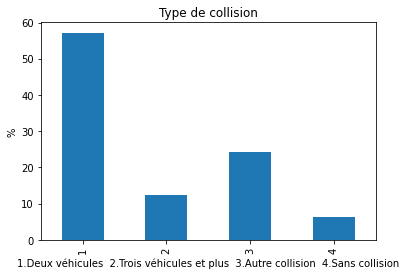

In [31]:
# Plot the percentage of rows for each category
grouped = dfAccidents.groupby('col_2').size()
grouped = grouped.apply(lambda x: x / len(dfAccidents) * 100)
grouped.plot(kind='bar')
plt.ylabel("%")
plt.xlabel("1.Deux véhicules  2.Trois véhicules et plus  3.Autre collision  4.Sans collision")
plt.title("Type de collision")
plt.show()

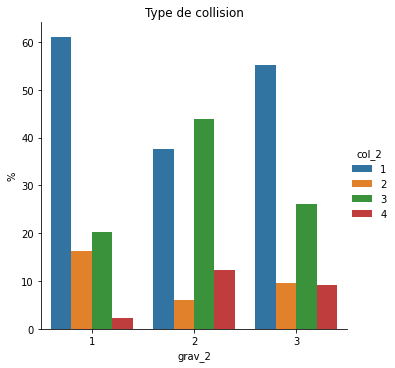

In [32]:
x="grav_2"
y="col_2"
(dfAccidents.groupby(x)[y].value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))


plt.ylabel("%")
plt.title("Type de collision")
plt.show()

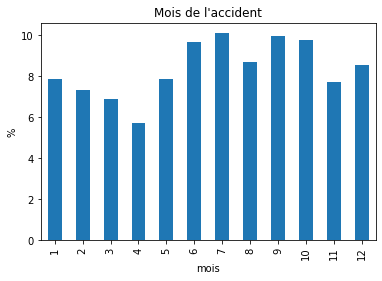

In [33]:
# Plot the percentage of rows for each month
grouped = dfAccidents.groupby('mois').size()
grouped = grouped.apply(lambda x: x / len(dfAccidents) * 100)
grouped.plot(kind='bar')
plt.ylabel("%")
plt.title("Mois de l'accident")
plt.show()

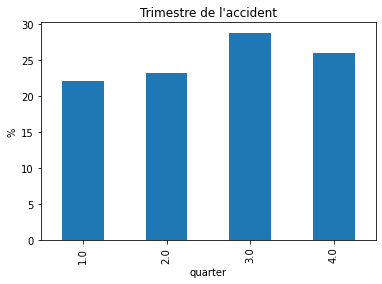

In [34]:
month_column = dfAccidents['mois']
dfAccidents['quarter'] = np.ceil(month_column/3)

grouped = dfAccidents.groupby('quarter').size()
grouped = grouped.apply(lambda x: x / len(dfAccidents) * 100)
grouped.plot(kind='bar')
plt.ylabel("%")
plt.title("Trimestre de l'accident")
plt.show()


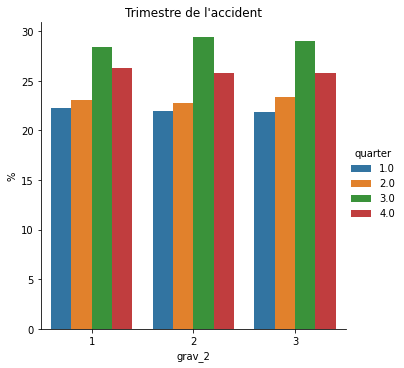

In [35]:
x="grav_2"
y="quarter"
(dfAccidents.groupby(x)[y].value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))


plt.ylabel("%")
plt.title("Trimestre de l'accident")
plt.show()

# Third part : Random forest classifier using intuitive variables

##Libraries

In [36]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score,precision_score, recall_score, f1_score,confusion_matrix
from scipy.stats import randint

In [ ]:
#!pip install category_encoders
#from category_encoders import TargetEncoder

In [37]:
#department as a text
print(dfAccidents["dep"].unique())
dfAccidents['dep'] = dfAccidents['dep'].astype(str)

#Grouping of Corse 
dfAccidents.loc[dfAccidents['dep'] == '2A','dep'] ='20' 
dfAccidents.loc[dfAccidents['dep'] == '2B','dep'] ='20' 


['93' '92' '94' '87' '69' '38' '34' '13' '988' '976' '974' '972' '2B' '91'
 '86' '83' '80' '78' '77' '76' '72' '71' '67' '66' '64' '60' '51' '50'
 '49' '45' '37' '35' '33' '31' '30' '29' '22' '19' '18' '17' '74' '81' '2'
 '59' '95' '63' '62' '973' '2A' '84' '9' '73' '43' '10' '36' '16' '7' '21'
 '40' '24' '4' '85' '27' '28' '52' '68' '42' '82' '11' '987' '44' '61'
 '14' '56' '58' '54' '47' '41' '3' '75' '1' '57' '32' '39' '15' '23' '6'
 '5' '26' '48' '986' '971' '89' '25' '12' '88' '65' '53' '70' '46' '90'
 '8' '79' '977' '55' '978' '975' '06' '03' '07' '01' '08' '02' '05' '04'
 '09']


##Training and test set with intuitive features

In [38]:
#Training and test set
features = ['agg','vma','catu','sexe','Age','lum','trajet','col_2']
X = dfAccidents[features]
y = dfAccidents['grav_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##Correlation matrix between features

<ipython-input-240-4df0e3a6e205>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


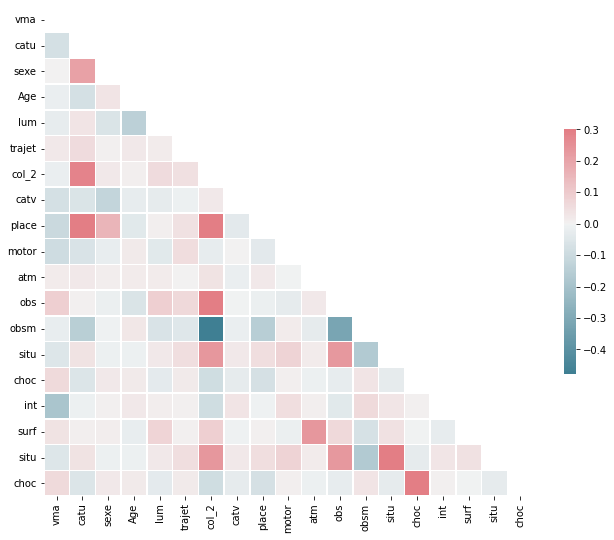

In [240]:
# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


##Training and test set without correlated variables

In [40]:
#Training and test set
features = ['vma','catu','sexe','Age','lum','trajet','col_2']
X = dfAccidents[features]
y = dfAccidents['grav_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



# Select features to scale
features_to_scale = ['vma']
scaler = MinMaxScaler()

# Fit and transform the selected features
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.fit_transform(X_test[features_to_scale])

##Random search to find the best hyperparameters

In [41]:

import time
start = time.perf_counter()
# your algorithm here


# Parameter grid
param_grid = {'n_estimators': [10, 20, 50], 
              'max_depth': [5, 10,20], 
              'min_samples_split': [2, 5, 10]}

# Create an instance of the RandomForestClassifier
rf = RandomForestClassifier()

# Create an instance of the RandomSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=5)

# Fit the RandomSearchCV instance to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)



end = time.perf_counter()
print("Execution time:", end - start)




{'n_estimators': 20, 'min_samples_split': 10, 'max_depth': 20}
Execution time: 489.72111141199997


##Cross validation on the training set to prevent overfitting

In [63]:
start = time.perf_counter()
# your algorithm here

#Cross validation on the training set to evaluate the performance of the model
from sklearn.model_selection import cross_val_score, cross_validate

# Create an instance of the RandomForestClassifier with the best hyperparameters
best_rf = RandomForestClassifier(n_estimators=20,max_depth=20,min_samples_split=10)

# Evaluate the performance of the model using cross-validation
scores = cross_val_score(best_rf, X_train, y_train, cv=5)

# Print the mean and standard deviation of the scores
print("Mean: {:.2f}, Std: {:.2f}".format(scores.mean(), scores.std()))

end = time.perf_counter()
print("Execution time:", end - start)

Mean: 0.69, Std: 0.00
Execution time: 104.9955020540001


##Training the classifier with the parameters found by cross validation

In [64]:
start = time.perf_counter()
# your algorithm here

# Train the classifier with the parameters found by cross validation
clf = RandomForestClassifier(n_estimators=10,max_depth=20,min_samples_split=5)
clf.fit(X_train, y_train)

end = time.perf_counter()
print("Execution time:", end - start)

Execution time: 12.783908842999608


##Accuracy, precision, recall and Confusion matrix

Accuracy on test set: 0.6928768839090006
Precision on test set: 0.6922380732493054
Recall: on test set 0.6928768839090006
Accuracy on training set: 0.7110846006180992
Precision on training set: 0.7127923391628803
Recall: on training set 0.7110846006180992
       1     2       3
1  73387   144   49031
2   1389  1394    4824
3  34526   320  128789
Execution time: 6.11621784099998


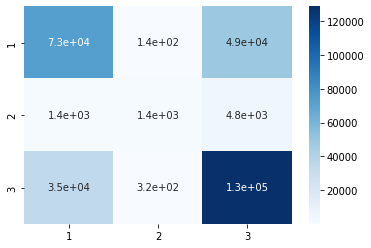

In [68]:
start = time.perf_counter()
# your algorithm here

# evaluate the classifier on the test and training set
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# evaluate the model using accuracy, precision, recall, and F1-score
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')


accuracy_training = accuracy_score(y_train, y_pred_train)
precision_training = precision_score(y_train, y_pred_train, average='weighted')
recall_training = recall_score(y_train, y_pred_train, average='weighted')


print("Accuracy on test set:", accuracy_test)
print("Precision on test set:", precision_test)
print("Recall: on test set", recall_test)


print("Accuracy on training set:", accuracy_training)
print("Precision on training set:", precision_training)
print("Recall: on training set", recall_training)


# calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# convert to a DataFrame
df_conf_matrix = pd.DataFrame(conf_matrix, index=clf.classes_, columns=clf.classes_)

df_conf_matrix = df_conf_matrix.astype(int)

# print the matrix
print(df_conf_matrix)
sns.heatmap(df_conf_matrix, annot = True, cmap = 'Blues')

end = time.perf_counter()
print("Execution time:", end - start)

##ROC Curves

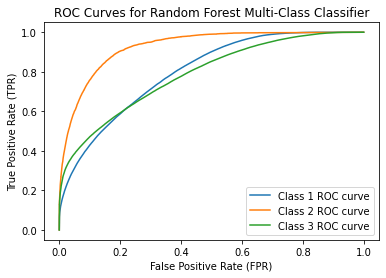

Execution time: 1.8803689909996137


In [69]:
start = time.perf_counter()
# your algorithm here

from sklearn.metrics import roc_curve

# predict the class probabilities for each instance using the random forest model
y_prob = clf.predict_proba(X_test)

# consider each class as a positive class and the rest of the classes as negative
n_classes = y_prob.shape[1]
for i in range(n_classes):
    j=i+1 
    y_true = (y_test == j).astype(int)
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, i])
    
    plt.plot(fpr, tpr, label='Class %d ROC curve' % j)

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Random Forest Multi-Class Classifier')
plt.legend()
plt.show()


end = time.perf_counter()
print("Execution time:", end - start)

#Fourth part : Random forest classifier adding technical features using feature selection

In [162]:
#Security equipement

# Define the function to be applied
def equipement(value1,value2,value3):
    if value1 >0 or value2>0 or value3>0:
        return 1
    elif value1==0 or value2==0 or value3==0:
        return 0    
    else:
        return -1

# Apply the function to the DataFrame
dfAccidents['secu'] = dfAccidents.apply(lambda x: equipement(x['secu1'], x['secu2'], x['secu3']), axis=1) 

In [164]:
#Catégorie du véhicule
dfAccidents['catv'].value_counts()
dfAccidents["catv"] = pd.to_numeric(dfAccidents["catv"])

#empty values are filled in with the mode
dfAccidents.loc[dfAccidents['catv']==-1,'catv']=99
dfAccidents.loc[dfAccidents['catv'].isna(),'catv']=99

dfAccidents["dep"] = pd.to_numeric(dfAccidents["dep"])

##Correlation matrix between features

In [231]:
#Training and test set
features = ['agg','vma','catu','sexe','Age','lum','trajet','col_2','secu','catv','place','motor','atm','obs','obsm','situ','choc','catr','int','surf','situ','choc']
X = dfAccidents[features]
y = dfAccidents['grav_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



# Select features to scale
features_to_scale = ['vma']
scaler = MinMaxScaler()

# Fit and transform the selected features
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.fit_transform(X_test[features_to_scale])



<ipython-input-233-4df0e3a6e205>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


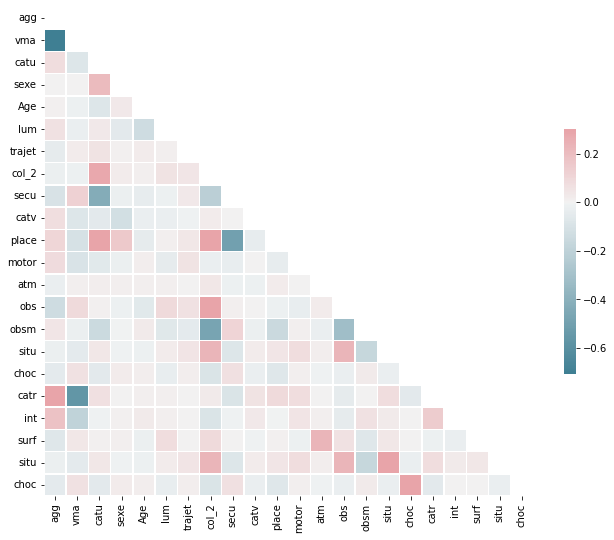

In [233]:

# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


##Training and test set without correlated variables

In [234]:
#Training and test set
features = ['vma','catu','sexe','Age','lum','trajet','col_2','catv','place','motor','atm','obs','obsm','situ','choc','int','surf','situ','choc']
X = dfAccidents[features]
y = dfAccidents['grav_2']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Select features to scale
features_to_scale = ['vma']
scaler = MinMaxScaler()

# Fit and transform the selected features
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.fit_transform(X_test[features_to_scale])



##Random search hyperparameters

In [235]:

import time
start = time.perf_counter()
# your algorithm here


# Parameter grid
param_grid = {'n_estimators': [10, 20, 50], 
              'max_depth': [5, 10,20], 
              'min_samples_split': [2, 5, 10]}

# Create an instance of the RandomForestClassifier
rf = RandomForestClassifier()

# Create an instance of the RandomSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=5)

# Fit the RandomSearchCV instance to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)



end = time.perf_counter()
print("Execution time:", end - start)


{'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 20}
Execution time: 719.4616856590001


##Cross validation on training set to prevent overfitting

In [236]:
start = time.perf_counter()
# your algorithm here

#Cross validation on the training set to evaluate the performance of the model
from sklearn.model_selection import cross_val_score, cross_validate

# Create an instance of the RandomForestClassifier with the best hyperparameters
best_rf = RandomForestClassifier(n_estimators=10,max_depth=20,min_samples_split=2)

# Evaluate the performance of the model using cross-validation
scores = cross_val_score(best_rf, X_train, y_train, cv=5)

# Print the mean and standard deviation of the scores
print("Mean: {:.2f}, Std: {:.2f}".format(scores.mean(), scores.std()))

end = time.perf_counter()
print("Execution time:", end - start)

Mean: 0.82, Std: 0.00
Execution time: 91.55710955800168


##Training the classifier with the parameters found by the cross validation

In [237]:
start = time.perf_counter()
# your algorithm here

# Train the classifier with the parameters found by cross validation
clf = RandomForestClassifier(n_estimators=10,max_depth=20,min_samples_split=5)
clf.fit(X_train, y_train)

end = time.perf_counter()
print("Execution time:", end - start)

Execution time: 19.838631741997233


##Acccuracy, precision, recall and confusion matrix

Accuracy on test set: 0.8235762617255041
Precision on test set: 0.8282186161230581
Recall: on test set 0.8235762617255041
Accuracy on training set: 0.8338603286544771
Precision on training set: 0.8381966997292088
Recall: on training set 0.8338603286544771
        1     2       3
1  103765     3   18794
2     731  2066    4810
3   27472    24  136139
Execution time: 5.803021108000394


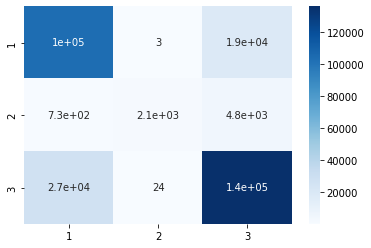

In [238]:
start = time.perf_counter()
# your algorithm here

# evaluate the classifier on the test and training set
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# evaluate the model using accuracy, precision, recall, and F1-score
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')


accuracy_training = accuracy_score(y_train, y_pred_train)
precision_training = precision_score(y_train, y_pred_train, average='weighted')
recall_training = recall_score(y_train, y_pred_train, average='weighted')


print("Accuracy on test set:", accuracy_test)
print("Precision on test set:", precision_test)
print("Recall: on test set", recall_test)


print("Accuracy on training set:", accuracy_training)
print("Precision on training set:", precision_training)
print("Recall: on training set", recall_training)


# calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# convert to a DataFrame
df_conf_matrix = pd.DataFrame(conf_matrix, index=clf.classes_, columns=clf.classes_)

df_conf_matrix = df_conf_matrix.astype(int)

# print the matrix
print(df_conf_matrix)
sns.heatmap(df_conf_matrix, annot = True, cmap = 'Blues')

end = time.perf_counter()
print("Execution time:", end - start)

##ROC curves

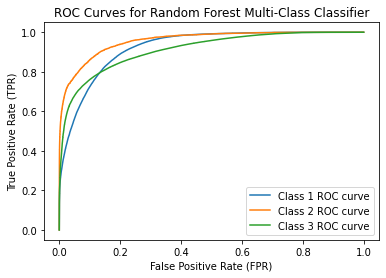

Execution time: 3.0124667229974875


In [239]:
start = time.perf_counter()
# your algorithm here

from sklearn.metrics import roc_curve

# predict the class probabilities for each instance using the random forest model
y_prob = clf.predict_proba(X_test)

# consider each class as a positive class and the rest of the classes as negative
n_classes = y_prob.shape[1]
for i in range(n_classes):
    j=i+1 
    y_true = (y_test == j).astype(int)
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, i])
    
    plt.plot(fpr, tpr, label='Class %d ROC curve' % j)

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Random Forest Multi-Class Classifier')
plt.legend()
plt.show()


end = time.perf_counter()
print("Execution time:", end - start)